**Predict the winner of an IPL match based on various features such as the teams playing, toss winner, toss decision, and other match-related factors using different machine learning models like Logistic Regression, SVM, KNN, Decision Trees, Random Forest, and XGBoost.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r'C:\Users\Lenovo\Downloads\ipl_matches.csv')

In [3]:
df = data.copy()
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**DATA EXPLORATION**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
df.shape

(756, 18)

In [6]:
df.dtypes

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [7]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [8]:
df.duplicated().sum()

0

**No duplicate values in the given data**

In [9]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
df.drop(columns = ['umpire3'], inplace = True)

In [11]:
#dropping missing rows
df.dropna(subset = ['winner'], axis=0, inplace = True)

In [12]:
#Filling missing rows with 'Unknown' for categorical
df.fillna('Unknown', inplace=True)

In [13]:
#Check the percentage of missing values
round((df.isnull().sum()/df.shape[0])*100,2)

id                 0.0
Season             0.0
city               0.0
date               0.0
team1              0.0
team2              0.0
toss_winner        0.0
toss_decision      0.0
result             0.0
dl_applied         0.0
winner             0.0
win_by_runs        0.0
win_by_wickets     0.0
player_of_match    0.0
venue              0.0
umpire1            0.0
umpire2            0.0
dtype: float64

In [14]:
#To find unique values in each column
df.nunique()

id                 752
Season              12
city                33
date               544
team1               15
team2               15
toss_winner         15
toss_decision        2
result               2
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             62
umpire2             66
dtype: int64

In [15]:
#We don't need id column hence drop it
df.drop(['id'], axis = 1, inplace = True)

In [16]:
#We don't need date column for our analysis
df.drop(['date'], axis = 1, inplace = True)

In [17]:
#We don't need venue column hence drop it
df.drop(['venue'], axis = 1, inplace = True)

In [18]:
#One umpire column is sufficient for our analysis
df.drop(['umpire2'], axis = 1, inplace = True)

In [19]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [20]:
# Replacing values and modifying the columns in place
df['team1'].replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)
df['team2'].replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)
df['winner'].replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)

df['team1'].replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace=True)
df['team2'].replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace=True)
df['winner'].replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace=True)

df['team1'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace=True)
df['team2'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace=True)
df['winner'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace=True)

In [21]:
print(df['team1'].unique())  # Check if the team names have been replaced

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Kochi Tuskers Kerala'
 'Pune Warriors']


In [22]:
df['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [23]:
df['SeasonYear'] = df['Season'].astype(str)
df['SeasonYear'] = df['SeasonYear'].map(lambda x: x[4:])
df['SeasonYear'] = df['SeasonYear'].astype(int)

In [24]:
df.drop(['Season'], axis = 1, inplace = True)

In [25]:
df.shape

(752, 13)

**Handling outliers**

In [26]:
mean_runs = df['win_by_runs'].mean()

In [27]:
std_runs = df['win_by_runs'].std()

In [28]:
l_bound = mean_runs - std_runs*2
l_bound

-33.673249028759635

In [29]:
u_bound = mean_runs + std_runs*2
u_bound

60.380695837270274

In [30]:
df['win_by_runs'].min()

0

In [31]:
df['win_by_runs'].max()

146

In [32]:
df = df[(df['win_by_runs'] >= l_bound) & (df['win_by_runs'] <= u_bound)]
df.head()

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,umpire1,SeasonYear
0,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,AY Dandekar,2017
1,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,A Nand Kishore,2017
2,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Nitin Menon,2017
3,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,AK Chaudhary,2017
4,Bangalore,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,Unknown,2017


In [33]:
df.shape

(709, 13)

**EXPLORATORY DATA ANALYSIS**

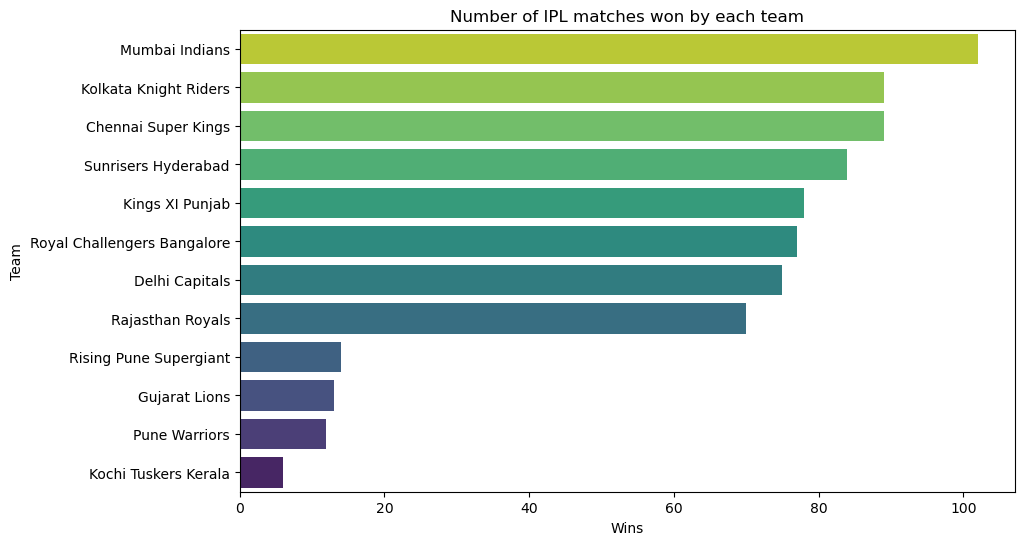

In [34]:
#Number of IPL matches won by each team
import matplotlib.pyplot as plt
import seaborn as sns

# Set a color palette (choose one or create a custom one)
color_palette = sns.color_palette("Set2", len(df['winner'].value_counts().index))  # You can change 'Set2' to any other palette

# Create the plot with custom colors
plt.figure(figsize=(10, 6))
sns.countplot(y='winner', data=df, order=df['winner'].value_counts().index, palette='viridis_r')

# Add labels and title
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of IPL matches won by each team')

# Display the plot
plt.show()


**From Bar graph, Mumbai Indians have the highest number of wins, followed by Kolkata Knight Riders and Chennai Super Kings.**

Text(0.5, 1.0, 'Toss Decision')

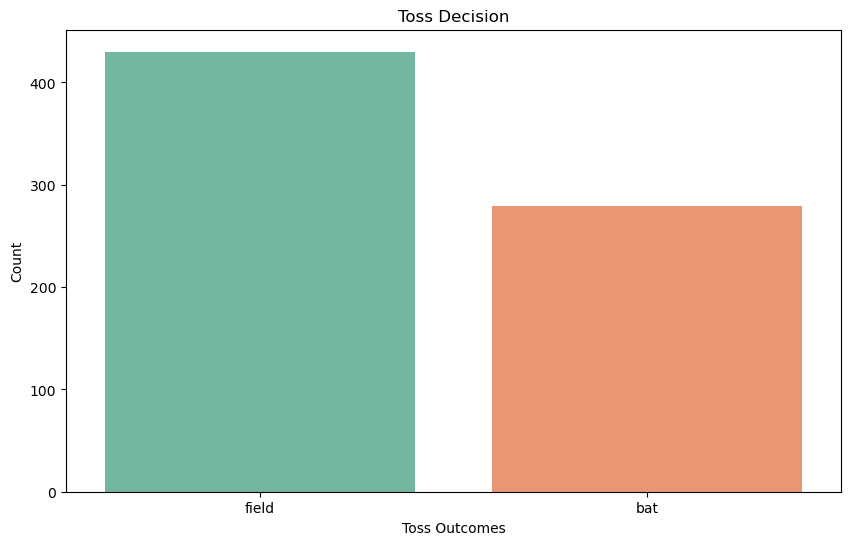

In [35]:
#The decision was taken by the toss winning team

plt.figure(figsize = (10,6))  # Set the figure size
sns.countplot(x = "toss_decision", data=df, palette='Set2')  # Create a count plot for toss decisions
plt.xlabel('Toss Outcomes')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.title('Toss Decision')  # Add a title to the plot


**From bar graph, most of the times a team has chosen to field over bat after winning the toss.**

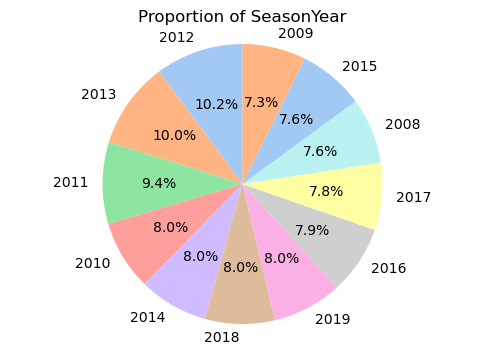

In [36]:
#IPL matches over the different seasons
target = df['SeasonYear'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(target, labels=target.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of SeasonYear')
plt.axis('equal')    # For equal round circle 
plt.show()

**From pie chart,The seasons are from the year between 2008 and 2019. The proportion is fairly distributed, with some years having slightly more matches. In 2012 and 2013, most of the teams played.**

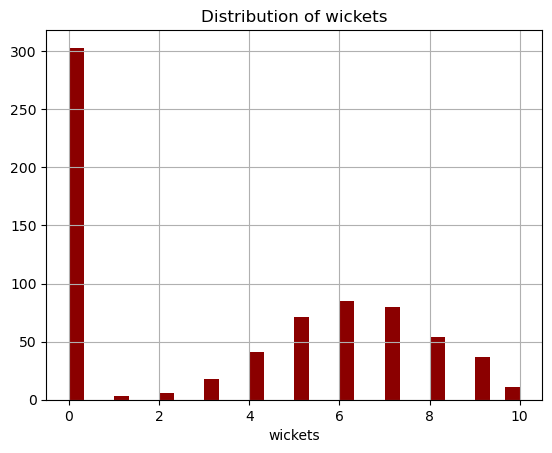

In [37]:
#distribution of the number of wickets

df['win_by_wickets'].hist(bins=30,color='darkred',alpha=1.0)
plt.title('Distribution of wickets')
plt.xlabel('wickets')    # For equal round circle 
plt.show()

**From histogram the insight gathered is mostof the matches have a lower number of wickets taken, with a few matches having higher wickets.**

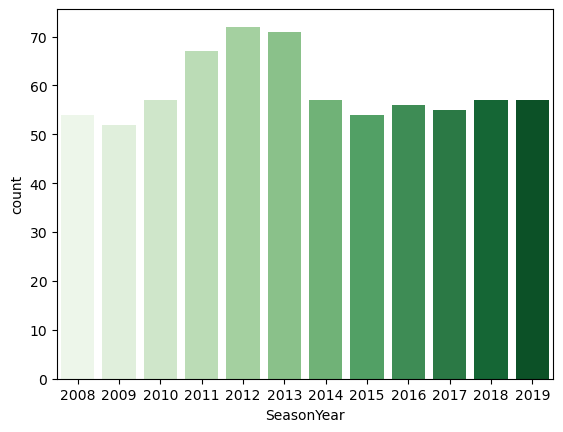

In [38]:
# Number of Ipl matches per season  
sns.countplot(x = 'SeasonYear', data = df, palette = 'Greens')  
plt.show()  

**The number of matches increased over the years peaking around 2012 and 2013. A decline is observed in later years, stabilizing around 60 matches per season.**

In [39]:
#Top 10 players
player = df['player_of_match'].value_counts().reset_index()  
# Count the number of times each player has won the Player of the Match award

player = player.set_axis(['player_of_match', 'Count'], axis='columns')  # Rename the columns for clarity

top_player = player.head(10)  # Select the top 10 players with the most "Player of the Match" awards

Text(0.5, 1.0, 'Top 10 player')

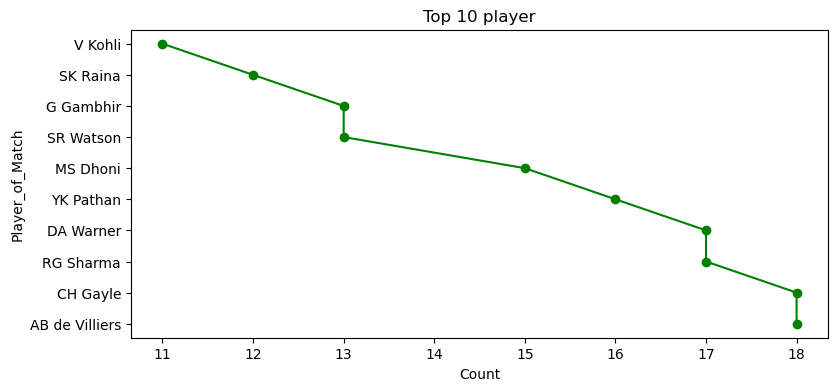

In [40]:
plt.figure(figsize=(9,4))
plt.plot(top_player['Count'], top_player['player_of_match'], 'o-g')
plt.xlabel('Count')
plt.ylabel('Player_of_Match')
plt.title('Top 10 player')

***The insight gathered here is Virat Kohli leads the chart, followed by Suresh Raina and Gautam Gambhir. The number of awards decreases gradually from left to right.**

In [41]:
corr = df.corr(numeric_only = True)
corr

,dl_applied,win_by_runs,win_by_wickets,SeasonYear
dl_applied,1.000000,-0.021746,-0.014077,-0.008667
win_by_runs,-0.021746,1.000000,-0.668536,-0.040732
win_by_wickets,-0.014077,-0.668536,1.000000,-0.014402
SeasonYear,-0.008667,-0.040732,-0.014402,1.000000


<Axes: >

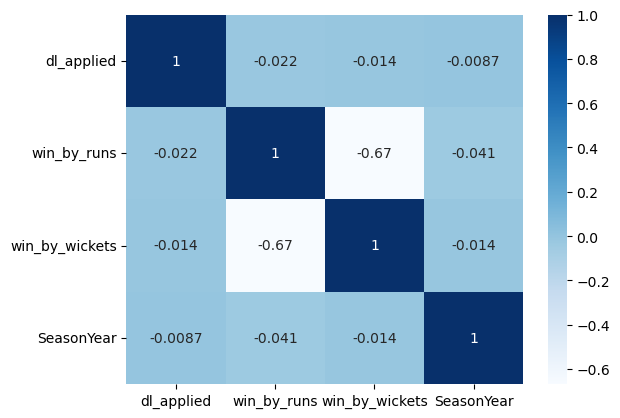

In [42]:
sns.heatmap(corr, annot = True, cmap='Blues')

**Strong negative correlation (-0.67) between win_by_runs and win_by_wickets indicating that teams winning by large number of runs are less likely to win by wickets.**

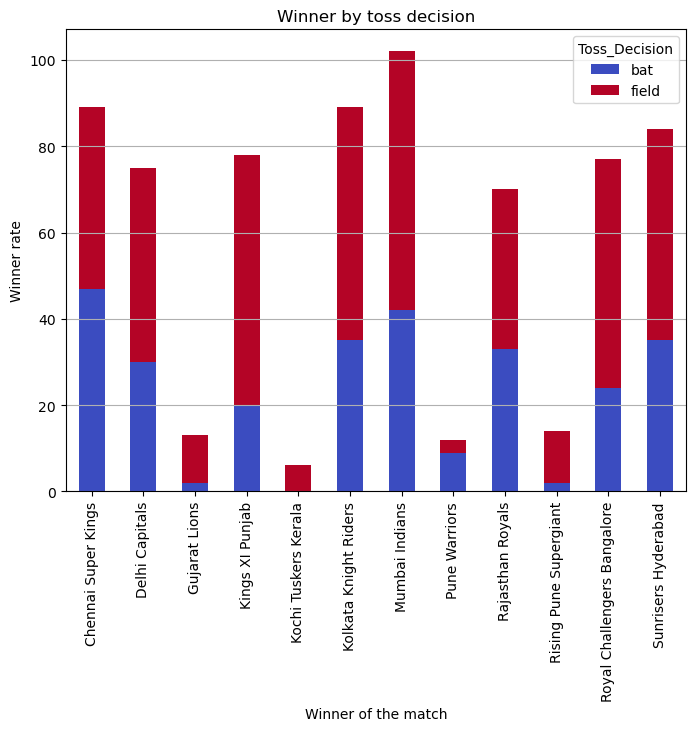

In [43]:
winner_toss = df.groupby(['winner','toss_decision']).size().unstack()
winner_toss.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8,6))
plt.xlabel('Winner of the match')
plt.ylabel('Winner rate')
plt.title('Winner by toss decision')
plt.legend(title='Toss_Decision')
plt.grid(axis='y')
plt.show()

**Teams like Mumbai Indians and Kolkata Knight Riders have a higher win percentage option to field. Some teams show a balanced winning rate regardless of the toss decision.**

**PREPROCESSING**

In [44]:
df['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [45]:
def binary_map(x):
    # Directly use the dictionary to map the value
    return {'bat': 1, 'field': 0}.get(x, x)  # .get() returns the original value if x is not in the dictionary

# Apply the binary_map function to the 'toss_decision' column
df['toss_decision'] = df['toss_decision'].apply(binary_map)


In [46]:
df['result'].unique()

array(['normal', 'tie'], dtype=object)

In [47]:
#We have to convert object dataype into numerical because regression are works well with numerical datatype
var_mod = ['city','team1','team2','toss_winner','toss_decision', 'result','winner', 'player_of_match', 'umpire1','SeasonYear']  
le = LabelEncoder()   # Create an instance of the LabelEncoder class
for i in var_mod:     # Loop through each column in the list 'var_mod'
    df[i] = le.fit_transform(df[i])  # Apply label encoding to each column

In [48]:
df.head()

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,umpire1,SeasonYear
0,14,11,10,13,0,0,0,11,35,0,220,6,9
1,26,6,9,11,0,0,0,9,0,7,195,1,9
2,28,2,5,7,0,0,0,5,0,10,33,38,9
3,15,9,3,5,0,0,0,3,0,6,59,3,9
4,2,10,1,13,1,0,0,10,15,0,96,57,9


In [49]:
x = df.drop(['winner'],axis=1)
y = df['winner']

In [50]:
x

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,player_of_match,umpire1,SeasonYear
0,14,11,10,13,0,0,0,35,0,220,6,9
1,26,6,9,11,0,0,0,0,7,195,1,9
2,28,2,5,7,0,0,0,0,10,33,38,9
3,15,9,3,5,0,0,0,0,6,59,3,9
4,2,10,1,13,1,0,0,15,0,96,57,9
...,...,...,...,...,...,...,...,...,...,...,...,...
751,23,5,6,8,0,0,0,0,9,62,36,11
752,8,0,6,0,1,0,0,0,6,22,37,11
753,32,11,1,2,0,0,0,0,2,166,57,11
754,32,1,0,0,0,0,0,0,6,54,55,11


In [51]:
y

0      11
1       9
2       5
3       3
4      10
       ..
751     6
752     6
753     1
754     0
755     6
Name: winner, Length: 709, dtype: int32

In [52]:
x.shape,y.shape

((709, 12), (709,))

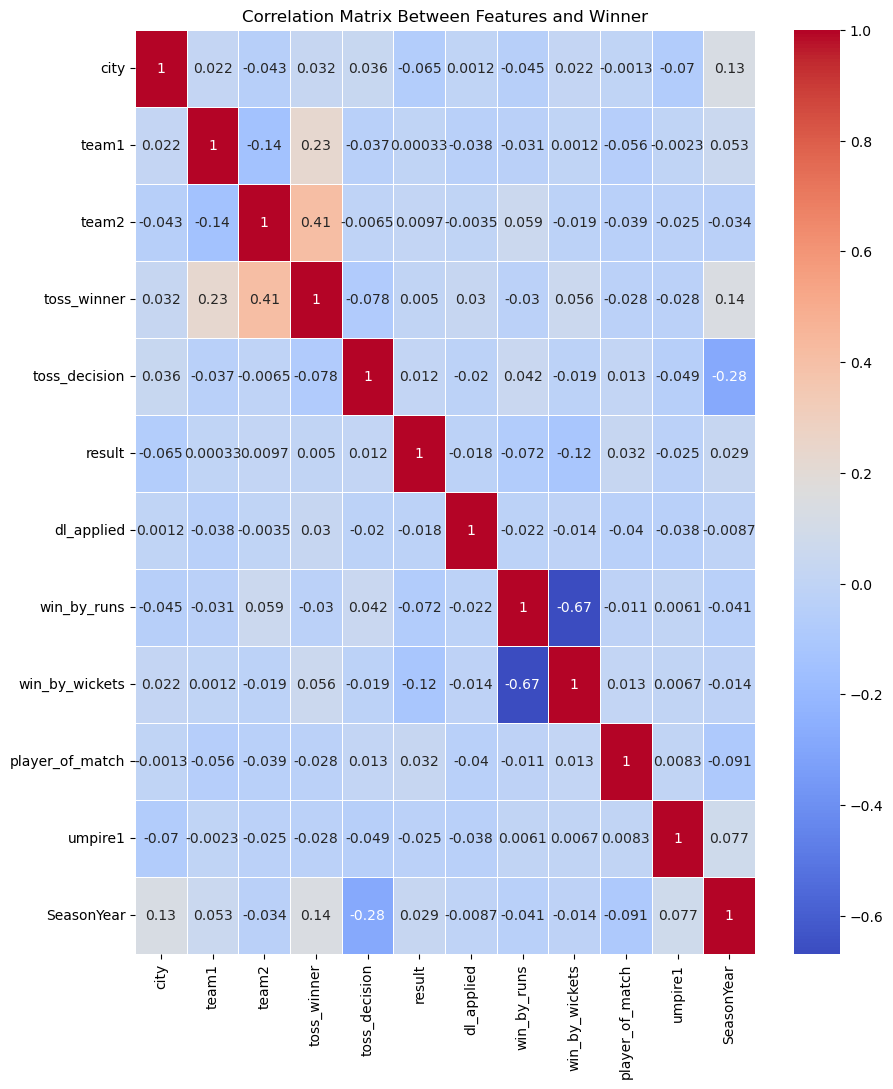

In [53]:
correlation_matrix = x.corr()

#Plot the correlation matrix using heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title and display the plot
plt.title('Correlation Matrix Between Features and Winner')
plt.show()

**Splitting the dataset into the Training set and Test set**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
X_train.shape

(567, 12)

In [58]:
y_train.shape

(567,)

**MODELS**

**LOGISTICS REGRESSION**

In [59]:
# fit the model on the training variables X_train and Y_train

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

LogisticRegression()

In [60]:
# Test the model on x_test

predictions = logmodel.predict(X_test)

In [61]:
logmodel.predict_proba(X_test)

array([[4.53515555e-01, 2.45494599e-01, 3.15130808e-02, ...,
        3.20545548e-05, 1.12160445e-03, 9.08838319e-05],
       [1.18921105e-01, 1.18767272e-01, 3.99586917e-03, ...,
        1.62832651e-03, 1.39794962e-02, 8.44798792e-03],
       [1.00864822e-02, 2.02571729e-02, 1.63807776e-03, ...,
        1.66923887e-02, 1.12214907e-01, 5.02476260e-01],
       ...,
       [4.32210932e-02, 7.67205433e-02, 3.82865335e-03, ...,
        1.05636092e-03, 8.23740281e-02, 4.12611411e-03],
       [1.27298222e-01, 2.44134495e-01, 6.89189268e-03, ...,
        4.44812599e-05, 5.43025168e-02, 2.72633979e-03],
       [1.72707098e-01, 1.02796991e-01, 1.48458818e-02, ...,
        8.75484276e-05, 6.35677578e-02, 2.23514930e-03]])

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.31      0.60      0.41        20
           1       0.27      0.18      0.21        17
           2       0.00      0.00      0.00         1
           3       0.07      0.06      0.06        17
           4       0.00      0.00      0.00         1
           5       0.25      0.05      0.08        22
           6       0.23      0.35      0.27        20
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         3
          10       0.30      0.27      0.29        11
          11       0.25      0.33      0.29        18

    accuracy                           0.23       142
   macro avg       0.14      0.15      0.13       142
weighted avg       0.21      0.23      0.20       142



In [63]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test,predictions,average = "weighted")
F1_score= f1_score(y_test,predictions, average = "weighted") 
Recall = recall_score(y_test,predictions,  average = "weighted")

In [64]:
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"F1_score : {F1_score}")
print(f"Recall : {Recall}")

Accuracy : 0.2323943661971831
Precision : 0.21000439814615188
F1_score : 0.19960170854364692
Recall : 0.2323943661971831


In [65]:
logistic_conf_mat = confusion_matrix(y_test,predictions)
logistic_conf_mat 

array([[12,  2,  0,  3,  0,  0,  2,  0,  0,  0,  0,  1],
       [ 6,  3,  1,  3,  0,  0,  2,  0,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  3,  0,  1,  0,  0,  4,  0,  3,  0,  0,  3],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  2,  0,  1,  0,  1,  9,  0,  3,  0,  0,  1],
       [ 3,  0,  0,  2,  0,  1,  7,  0,  0,  0,  2,  5],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  0,  3,  0,  0,  0,  2,  2],
       [ 0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1],
       [ 2,  1,  0,  1,  0,  0,  0,  0,  0,  0,  3,  4],
       [ 4,  0,  0,  0,  0,  1,  3,  0,  1,  1,  2,  6]], dtype=int64)

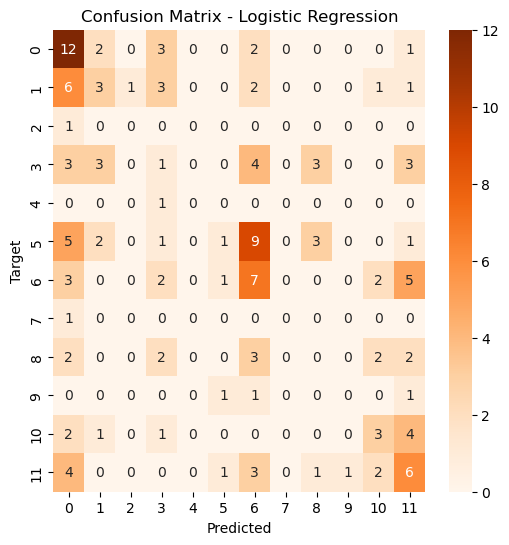

In [66]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(logistic_conf_mat , annot=True, fmt="d", cmap='Oranges', xticklabels=logmodel.classes_, yticklabels=logmodel.classes_)
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [67]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define Stratified KFold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score_grid = []
cv_score_random = []

# Define hyperparameter grids for both GridSearchCV and RandomizedSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solver options for LogisticRegression
    'max_iter': [100, 200, 300]
}

# Define parameters for RandomizedSearchCV (sampling from the grid)
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Initialize counters and containers for results
pred_test_full_grid = 0
pred_test_full_random = 0
i = 1

# Loop through Stratified KFold splits
for train_index, test_index in kf.split(x, y):
    print(f'{i} of KFold {kf.n_splits}')
    
    # Split data into training and validation sets
    xtr, xvl = x.iloc[train_index], x.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    # -------------------------------------------
    # GridSearchCV
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='roc_auc_ovr', n_jobs=-1)
    grid_search.fit(xtr, ytr)
    best_logmodel_grid = grid_search.best_estimator_
    score_grid = roc_auc_score(yvl, best_logmodel_grid.predict_proba(xvl), multi_class='ovr')
    print(f'GridSearchCV ROC AUC score: {score_grid}')
    cv_score_grid.append(score_grid)
    # pred_test_full_grid += best_model_grid.predict_proba(x_test)[:,1]

    # -------------------------------------------
    # RandomizedSearchCV
    random_search = RandomizedSearchCV(LogisticRegression(), param_dist, cv=3, n_iter=10, scoring='roc_auc_ovr', n_jobs=-1, random_state=42)
    random_search.fit(xtr, ytr)
    best_logmodel_grid2 = random_search.best_estimator_
    score_random = roc_auc_score(yvl, best_logmodel_grid2.predict_proba(xvl), multi_class='ovr')
    print(f'RandomizedSearchCV ROC AUC score: {score_random}')
    cv_score_random.append(score_random)
    # pred_test_full_random += best_model_random.predict_proba(x_test)[:,1]

    i += 1

# Compare results
print(f'\nAverage ROC AUC score for GridSearchCV: {np.mean(cv_score_grid)}')
print(f'Average ROC AUC score for RandomizedSearchCV: {np.mean(cv_score_random)}')


1 of KFold 5
GridSearchCV ROC AUC score: 0.7609712349655365
RandomizedSearchCV ROC AUC score: 0.7647537995705133
2 of KFold 5
GridSearchCV ROC AUC score: 0.7445802993384629
RandomizedSearchCV ROC AUC score: 0.7445802993384629
3 of KFold 5
GridSearchCV ROC AUC score: 0.7796360055903055
RandomizedSearchCV ROC AUC score: 0.7785312161241748
4 of KFold 5
GridSearchCV ROC AUC score: 0.7100441170284234
RandomizedSearchCV ROC AUC score: 0.6627806159176103
5 of KFold 5
GridSearchCV ROC AUC score: 0.8020457212889377
RandomizedSearchCV ROC AUC score: 0.8020457212889377

Average ROC AUC score for GridSearchCV: 0.7594554756423332
Average ROC AUC score for RandomizedSearchCV: 0.7505383304479397


**KNN Implementation**

In [70]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV

In [71]:
train_x1,test_x1,train_y1,test_y1 = train_test_split(x,y, test_size = 0.20, random_state = 42, stratify=y)

In [72]:
print(train_x1.shape)  # Should match y_train.shape[0]
print(test_x1.shape)   # Should match y_test.shape[0]


(567, 12)
(142, 12)


In [73]:
print(train_y1.shape)  # Should match y_train.shape[0]
print(test_y1.shape)   # Should match y_test.shape[0]


(567,)
(142,)


In [74]:
# Create an instance of the KNN classifier
knn = KNN()

# Define the parameter grid for GridSearchCV
KNN_parameter = {
    'n_neighbors': range(2, 20, 2),  # Testing different values of k (from 2 to 20 with step size 2)
    'metric': ['euclidean', 'manhattan'],  # Distance metrics for KNN
    'weights': ['uniform', 'distance']  # Weighting methods for neighbors
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=KNN_parameter, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model with GridSearchCV to find the best hyperparameters
grid_search.fit(train_x1, train_y1)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [75]:
# Predict with the best model on the test set
best_knn_model = grid_search.best_estimator_
test_predict = best_knn_model.predict(test_x1)

# Calculate performance metrics
KNN_accuracy = accuracy_score(test_y1, test_predict)
KNN_precision = precision_score(test_y1, test_predict, average='weighted')
KNN_f1 = f1_score(test_y1, test_predict, average='weighted')
KNN_recall = recall_score(test_y1, test_predict, average='weighted')

# Print the performance metrics
print(f"Accuracy: {KNN_accuracy}")
print(f"Precision: {KNN_precision}")
print(f"F1 Score: {KNN_f1}")
print(f"Recall: {KNN_recall}")

Accuracy: 0.44366197183098594
Precision: 0.4502012072434608
F1 Score: 0.43557636648081427
Recall: 0.44366197183098594


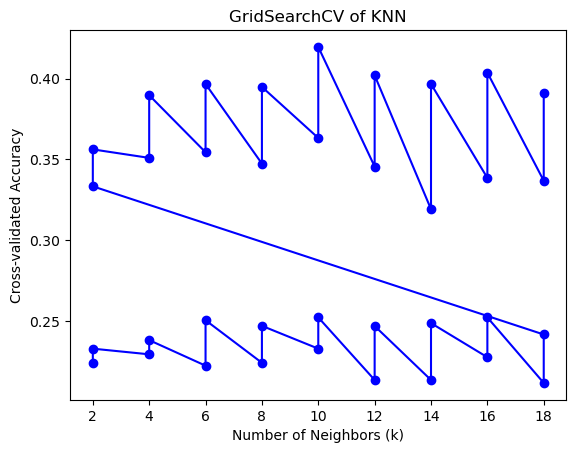

In [76]:
# Create a plot for visualizing the best 'n_neighbors' for the KNN model
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
k_values = results['param_n_neighbors'].data

plt.plot(k_values, mean_test_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-validated Accuracy')
plt.title('GridSearchCV of KNN')
plt.show()


In [77]:
cm = confusion_matrix(test_y1, test_predict)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 8  3  0  0  0  3  2  0  0  1  1  0]
 [ 0  5  0  5  0  1  4  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0]
 [ 1  3  0  8  0  2  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  1  0  1  0  8  6  0  1  0  0  1]
 [ 1  0  0  1  0  2 13  0  2  0  0  1]
 [ 0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  1  0  1  0  1  2  0  7  0  2  0]
 [ 0  0  0  0  0  2  1  0  0  0  0  0]
 [ 1  0  0  0  0  2  2  0  4  0  4  2]
 [ 1  1  0  0  0  0  1  0  0  1  3 10]]


**SVC IMPLEMENTATION**

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [80]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify=y)

In [81]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [82]:
# Define the parameter grid
svc_parameter = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types: linear and radial basis function (RBF)
    'gamma': ['scale', 'auto']  # Gamma values for 'rbf' kernel
}

In [83]:
# Apply GridSearchCV to find the best hyperparameters
svc_grid_search = GridSearchCV(estimator=SVC(), param_grid=svc_parameter, cv=10, n_jobs=-1, verbose=2)
svc_grid_search.fit(X_train2, y_train2)

# Get the best parameters and best score from GridSearchCV
best_params = svc_grid_search.best_params_
best_score = svc_grid_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.2f}")

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.59


In [84]:
# Train the model with the best parameters
best_classifier = svc_grid_search.best_estimator_
best_classifier.fit(X_train2, y_train2)

SVC(C=100)

In [85]:
# Predict the results on the test set
y_pred = best_classifier.predict(X_test2)

# Accuracy score
accuracy = accuracy_score(y_test2, y_pred)
print(f"Test set accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
svc_matrix = confusion_matrix(y_test2, y_pred)
print("Confusion Matrix:")
print(svc_matrix)

Test set accuracy: 64.79%
Confusion Matrix:
[[12  4  0  2  0  0  0  0  0  0  0  0]
 [ 3  9  0  2  0  0  0  0  0  0  1  0]
 [ 0  0  2  1  0  0  0  0  0  0  0  0]
 [ 1  0  2 10  0  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  2  1 13  2  0  0  0  0  0]
 [ 0  0  0  1  0  1 14  2  1  0  1  0]
 [ 0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  1  0  0  3  1  8  1  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  2  0 11  2]
 [ 0  0  0  0  0  0  1  0  0  1  3 12]]


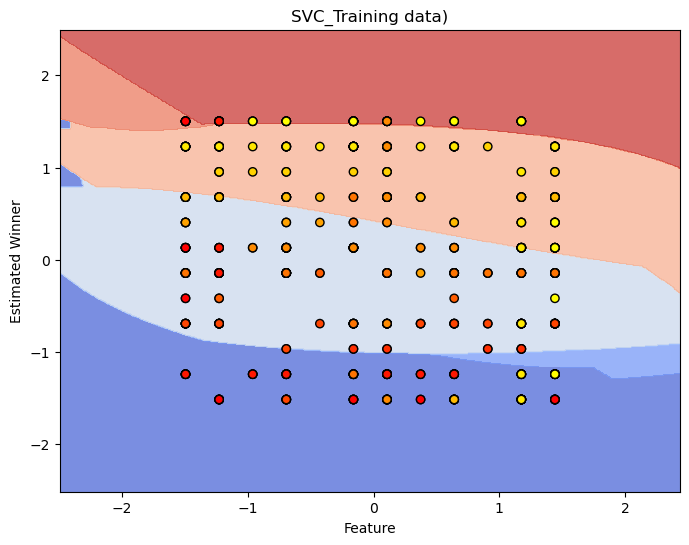

In [86]:
# Assuming best_classifier, X_train, y_train, and the necessary imports are already defined.
plt.figure(figsize=(8, 6))

# Select features for visualization
X_set, y_set = X_train2[:, 1:12], y_train2 

# Create meshgrid for the features you want to visualize
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Fix toss_decision to a constant value (assume toss_decision is the 7th feature)
fixed_toss_decision = 0  

# Create the input grid for prediction, add the fixed toss_decision value to match the 7 features
grid_input = np.array([fixed_toss_decision] * len(X1.ravel()), dtype=int)

# Prepare the full input grid with the other features from the meshgrid
X_grid = np.array([grid_input, X1.ravel(), X2.ravel()]).T

# If the classifier expects 7 features, you need to fill the remaining features
# Here, we assume you have 5 more features that need to be filled (you can replace them with other fixed values)
remaining_features = np.ones((X_grid.shape[0], X_set.shape[1] - 2))  # Assuming 5 remaining features
X_grid_full = np.hstack([X_grid, remaining_features])

# Predict the class labels for each point in the grid
Z = best_classifier.predict(X_grid_full)

# Reshape Z to match the shape of the meshgrid
Z = Z.reshape(X1.shape)

# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap='coolwarm')

# Scatter plot of the training set data points
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap='autumn', edgecolors='black')
plt.title('SVC_Training data)')
plt.xlabel('Feature')
plt.ylabel('Estimated Winner')
plt.show()


In [88]:
# Calculate performance metrics
SVC_accuracy = accuracy_score(y_test2, y_pred)
SVC_precision = precision_score(y_test2, y_pred, average='weighted')
SVC_f1 = f1_score(y_test2, y_pred, average='weighted')
SVC_recall = recall_score(y_test2, y_pred, average='weighted')

# Print the performance metrics
print(f"Accuracy: {SVC_accuracy}")
print(f"Precision: {SVC_precision}")
print(f"F1 Score: {SVC_f1}")
print(f"Recall: {SVC_recall}")

Accuracy: 0.647887323943662
Precision: 0.6583704586186176
F1 Score: 0.6495495144996397
Recall: 0.647887323943662


**DECISION TREE IMPLEMENTATION**

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [91]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify=y)

In [92]:
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

In [93]:
# Initialize a Decision Tree Classifier
DT_cls = DecisionTreeClassifier(random_state=42)

In [95]:
# Hyperparameter grid for tuning
decision_parameter1 = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=DT_cls, param_grid=decision_parameter1, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train3, y_train3)

# Best model 
tree_best_model = grid_search.best_estimator_
print(tree_best_model)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)


In [97]:
# Predictions and Evaluation 
decision_predictor = tree_best_model.predict(X_test3)

conf_matrix = confusion_matrix(y_test3, decision_predictor)

In [98]:
decision_accuracy = accuracy_score(y_test3, decision_predictor)
decision_precision = precision_score(y_test3,decision_predictor,average = "weighted")
decision_F1_score= f1_score(y_test3,decision_predictor, average = "weighted") 
decision_Recall = recall_score(y_test3,decision_predictor,  average = "weighted")
print(f"Accuracy : {decision_accuracy}")
print(f"Precision : {decision_precision}")
print(f"F1_score : {decision_F1_score}")
print(f"Recall : {decision_Recall}")

Accuracy : 0.9014084507042254
Precision : 0.9168137027291957
F1_score : 0.902456680973829
Recall : 0.9014084507042254


In [99]:
print("\n--- Results ---")
print("Best Parameters:", grid_search.best_params_)
print("Decision Tree Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test3, decision_predictor))


--- Results ---
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Confusion Matrix:
 [[18  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0]
 [ 1  1  0 14  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 18  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  1  0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 14  0]
 [ 0  0  0  0  0  0  0  0  0  5  0 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       0.93      0.93      0.93        15
           2       1.00      1.00      1.00         3
           3       0.93      0.88      0.90        16
           4       1.00      1.00      1.00         1
           5       1.00  

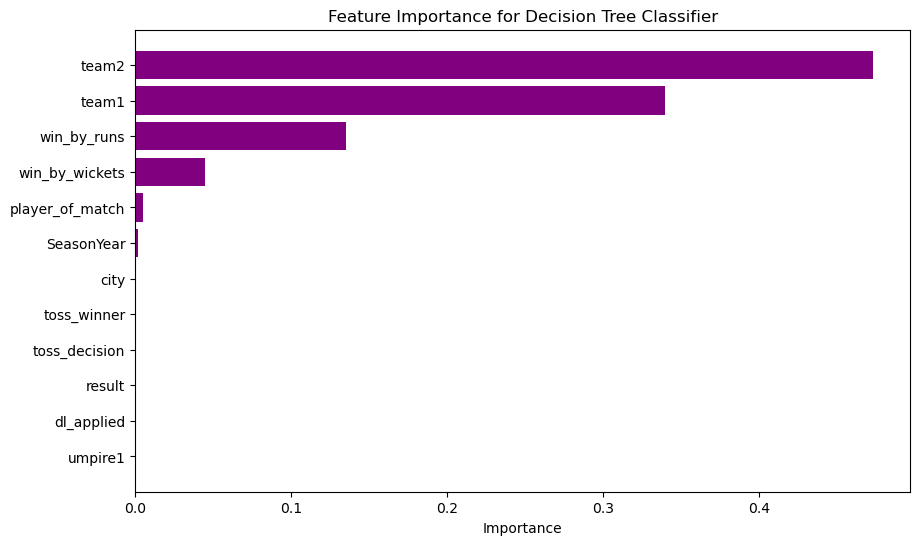

            Feature  Importance
2             team2    0.472949
1             team1    0.339578
7       win_by_runs    0.135434
8    win_by_wickets    0.045068
9   player_of_match    0.005350
11       SeasonYear    0.001621
0              city    0.000000
3       toss_winner    0.000000
4     toss_decision    0.000000
5            result    0.000000
6        dl_applied    0.000000
10          umpire1    0.000000


In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the best model (tree_best_model) after grid search

# Get feature importances from the best Decision Tree model
feature_importance = tree_best_model.feature_importances_

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': x.columns,  # Assuming 'x' is the original DataFrame with feature names
    'Importance': feature_importance
})

# Sort features by importance
decision_tree_importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance graph
plt.figure(figsize=(10, 6))
plt.barh(decision_tree_importance_df['Feature'], decision_tree_importance_df['Importance'], color='purple')
plt.xlabel('Importance')
plt.title('Feature Importance for Decision Tree Classifier')
plt.gca().invert_yaxis()  # to show the most important features at the top
plt.show()

# Print the sorted feature importance
print(decision_tree_importance_df)


**RANDOM FOREST**

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify=y)

In [105]:
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train4)
X_test4 = scaler.transform(X_test4)

In [106]:
# Hyperparameter tuning using GridSearchCV
random_forest_parameter = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest_grid_search = GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=42),
                           param_grid=random_forest_parameter, 
                           cv=3, n_jobs=-1, verbose=2)

In [107]:
# Fit the grid search to the data
random_forest_grid_search.fit(X_train4, y_train4)

# Best parameters and model
print("Best Parameters:", random_forest_grid_search.best_params_)
random_search_best_model = random_forest_grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = random_search_best_model.predict(X_test4)
print("Best Model Accuracy:", accuracy_score(y_test4, y_pred_best))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Model Accuracy: 0.852112676056338


In [108]:
# Get OOB score (Out-of-Bag Score)
print("OOB Score of the Random Forest:", random_search_best_model.oob_score_)

# Classification Report
print(classification_report(y_test4, y_pred_best))

OOB Score of the Random Forest: 0.8148148148148148
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.87      0.93        15
           2       1.00      0.67      0.80         3
           3       0.74      0.88      0.80        16
           4       0.00      0.00      0.00         1
           5       0.85      0.94      0.89        18
           6       0.72      0.90      0.80        20
           7       1.00      0.50      0.67         2
           8       0.83      0.71      0.77        14
           9       0.00      0.00      0.00         3
          10       1.00      0.73      0.85        15
          11       0.89      1.00      0.94        17

    accuracy                           0.85       142
   macro avg       0.74      0.68      0.70       142
weighted avg       0.84      0.85      0.84       142



In [109]:
random_forest_accuracy = accuracy_score(y_test4, y_pred_best)
random_forest_precision = precision_score(y_test4,y_pred_best,average = "weighted")
random_forest_F1_score= f1_score(y_test4,y_pred_best, average = "weighted") 
random_forest_Recall = recall_score(y_test4,y_pred_best,  average = "weighted")
print(f"Accuracy : {random_forest_accuracy}")
print(f"Precision : {random_forest_precision}")
print(f"F1_score : {random_forest_F1_score}")
print(f"Recall : {random_forest_Recall}")

Accuracy : 0.852112676056338
Precision : 0.8420187793427231
F1_score : 0.8389922078580344
Recall : 0.852112676056338


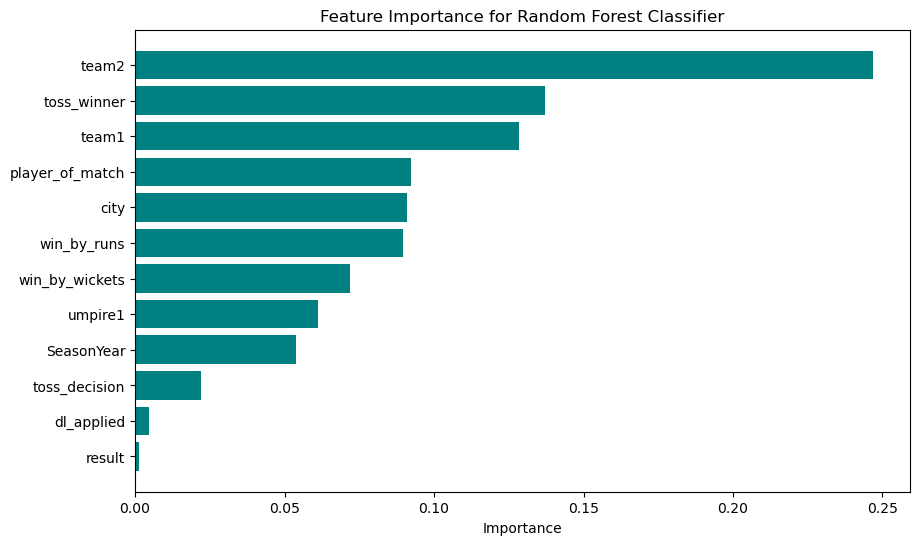

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# After scaling X_train4, convert it back to a DataFrame with the original feature names
X_train4_df = pd.DataFrame(X_train4, columns=x.columns)  # assuming 'x' was the original DataFrame

# Get feature importances from the best Random Forest model
importances = random_search_best_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train4_df.columns,  # Now you can use the column names
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.gca().invert_yaxis()  # to show the most important features at the top
plt.show()


In [111]:
with open('random_forest.pkl','wb') as file:
    pickle.dump(random_search_best_model, file)

print("Model saved successfully!")



Model saved successfully!


**XGBOOST**

In [112]:
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb 
from sklearn.model_selection import RandomizedSearchCV

In [113]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify=y)

In [114]:
scaler = StandardScaler()
X_train5 = scaler.fit_transform(X_train5)
X_test5 = scaler.transform(X_test5)

In [115]:
boost_cls = xgb.XGBClassifier(n_jobs = -1)
boost_cls.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [116]:
# Fit the model to our train and target
boost_cls.fit(X_train5, y_train5)  # default 

# Get our predictions
boost_predictions = boost_cls.predict(X_test5)

print(boost_predictions)

[ 0 10  6  0  6  6 11  6  6  6  6  1  0 11 10  5  8  3  5  6  0  1  7  3
  5  3  8  8  5  0 11  8  8  1 10 10  1 10  7  8  6  2 11  3  5  3  5 11
  5  6  5 11 11 11  3  0  3  5 10  3 11  5  1  3  6  6  3  0 11 10  8  0
  1  5  1 10 11  0  2 10  0  3  0  5  6 10  8 11  5  1  0  1  6  1  5  3
 10  0  8 11  8 10  5  1 11  6  1  6  6  8  3  4  8  0  8  3  3  0 11  0
 10  6  5 11  8  0  1  5  3 11  0  6  1  2 10 10  0 11  6  0  5 11]


In [117]:
boost_pred_prob = boost_cls.predict_proba(X_test5)

print(boost_pred_prob)

[[9.94598866e-01 2.59622582e-03 1.03532779e-03 ... 9.78861499e-05
  9.60363541e-05 6.58124118e-05]
 [2.20353249e-04 1.67760489e-04 2.01277842e-04 ... 4.18952142e-04
  9.90737140e-01 7.29653344e-04]
 [1.01470435e-02 1.05143664e-02 1.61265377e-02 ... 3.71957012e-02
  7.61487149e-03 1.22039001e-02]
 ...
 [8.99351954e-01 3.67849730e-02 1.24888786e-03 ... 1.82822661e-03
  8.90735013e-04 1.42351957e-03]
 [6.18025148e-03 4.63839900e-03 3.23832966e-03 ... 4.07511406e-02
  2.34417338e-02 1.13322390e-02]
 [9.28908266e-05 7.02118195e-05 2.34638559e-04 ... 1.83862110e-04
  2.31234892e-03 9.95945156e-01]]


In [118]:
xgboost_accuracy = accuracy_score(y_test5, boost_predictions)
xgboost_precision = precision_score(y_test5, boost_predictions, average='weighted')
xgboost_F1_score = f1_score(y_test5, boost_predictions, average='weighted')
xgboost_recall = recall_score(y_test5, boost_predictions, average='weighted')
print("Accuracy :",xgboost_accuracy)
print("Precision:",xgboost_precision)
print("F1_score:",xgboost_F1_score)
print("Recall:",xgboost_recall)


Accuracy : 0.9507042253521126
Precision: 0.932468495181616
F1_score: 0.9407813081351589
Recall: 0.9507042253521126


In [119]:
# A parameter grid for XGBoost
xgboost_params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5

param_comb = 100

best_boost = RandomizedSearchCV(boost_cls, param_distributions=xgboost_params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)


In [120]:
best_boost.fit(X_train5, y_train5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=3)

In [121]:
best_xgboost = best_boost.best_estimator_
print('\n Best estimator:')
print(best_xgboost)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(best_boost.best_score_ )
print('\n Best hyperparameters:')
print(best_boost.best_params_)


 Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

 Best accuracy for 5-fold search with 100 parameter combinations:
0.9682502716969414

 Best hyperparameters:
{'subsample': 1.0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.25, 'gamma': 0.1, 

In [122]:
# Plot feature importance
xgboost_feature_importance = best_xgboost.feature_importances_

# Create a DataFrame for easy plotting
xgboost_feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importance
})

# Sort features by importance
xgboost_feature_importance = xgboost_feature_importance.sort_values(by='Importance', ascending=False)

print(xgboost_feature_importance)

            Feature  Importance
2             team2    0.472949
1             team1    0.339578
7       win_by_runs    0.135434
8    win_by_wickets    0.045068
9   player_of_match    0.005350
11       SeasonYear    0.001621
0              city    0.000000
3       toss_winner    0.000000
4     toss_decision    0.000000
5            result    0.000000
6        dl_applied    0.000000
10          umpire1    0.000000


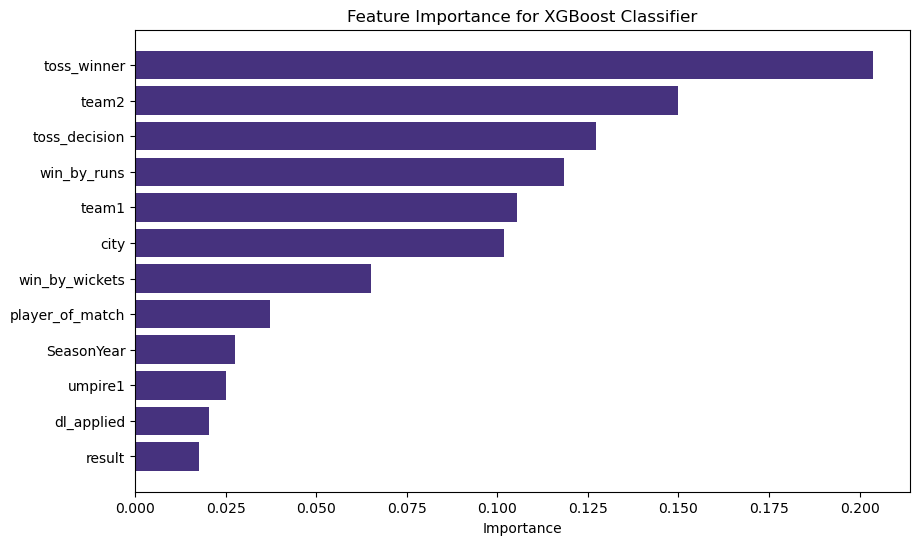

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# After scaling X_train5, convert it back to a DataFrame with the original feature names
X_train5_df = pd.DataFrame(X_train5, columns=x.columns)  # assuming 'x' was the original DataFrame with feature names

# Get feature importances from the best XGBoost model
importances = best_xgboost.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train5_df.columns,  # Using original feature names
    'Importance': importances
})
sns.set_palette("viridis")
# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for XGBoost Classifier')
plt.gca().invert_yaxis()  # to show the most important features at the top
plt.show()


In [126]:
import pickle

# Save the best_xgboost model to a file
with open('best_xgboost.pkl', 'wb') as file:
    pickle.dump(best_xgboost, file)

print("Model saved successfully!")


Model saved successfully!


**XGBoost outperforms all other models with the highest accuracy of 95.07%, making it the most reliable choice for predicting IPL match winners. Its superior performance after hyperparameter tuning solidifies it as the optimal model for this task.**

**The accurate measure for evaluating the performance of a predictive model like XGBoost is based on accuracy, precision, recall, and F1-score.

-Accuracy gives an overall measure of the correct predictions (95.07% for XGBoost).
-Precision (93.25%) measures how many of the predicted positive outcomes are actually correct.
-Recall (95.07%) shows how many of the actual positive outcomes are correctly predicted.
-F1-score (94.08%) provides a balanced measure of precision and recall, giving a more comprehensive evaluation.

These metrics combined demonstrate the robustness and efficiency of the XGBoost model in accurately predicting IPL match winners**

**Additional features could be incorporated
1. batting average
2. bowling economy
3. strike rate
4. Weather Conditions
5. Toss Decision Influence
 
The model would likely gain more context and nuance, resulting in more accurate predictions.**